# **Exploratory Data Analysis**

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

In [ ]:
# import anime dataset
anime_df = pd.read_csv("cleaned_anime.csv")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.000,9.260,793665
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.000,9.250,114262
2,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.000,9.170,673572
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.000,9.160,151266
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10.000,9.150,93351


In [ ]:
# how many animes do we have in the dataset now?
print(f"The dataset contains {anime_df.shape[0]} anime shows")

The dataset contains 3787 anime shows


In [ ]:
import pandas as pd

# Calculate summary statistics
summ_stats = anime_df[["episodes", "rating", "members"]].describe()

# Calculate mode separately
mode = anime_df[["episodes", "rating", "members"]].mode().iloc[0]

# Convert mode to a DataFrame
mode_df = pd.DataFrame(mode.values.reshape(1, -1), columns=["episodes", "rating", "members"], index=["mode"])

# Concatenate summary statistics with mode DataFrame
summ_stats = pd.concat([summ_stats, mode_df])

# Display summary statistics
print(summ_stats)


       episodes    rating       members
count 3,578.000 3,671.000     3,787.000
mean     35.916     6.902    42,683.658
std      80.640     0.864    89,121.009
min       2.000     2.670        12.000
25%      12.000     6.440       483.000
50%      24.000     6.940     5,947.000
75%      39.000     7.460    44,246.000
max   1,818.000     9.600 1,013,917.000
mode     12.000     6.500       102.000


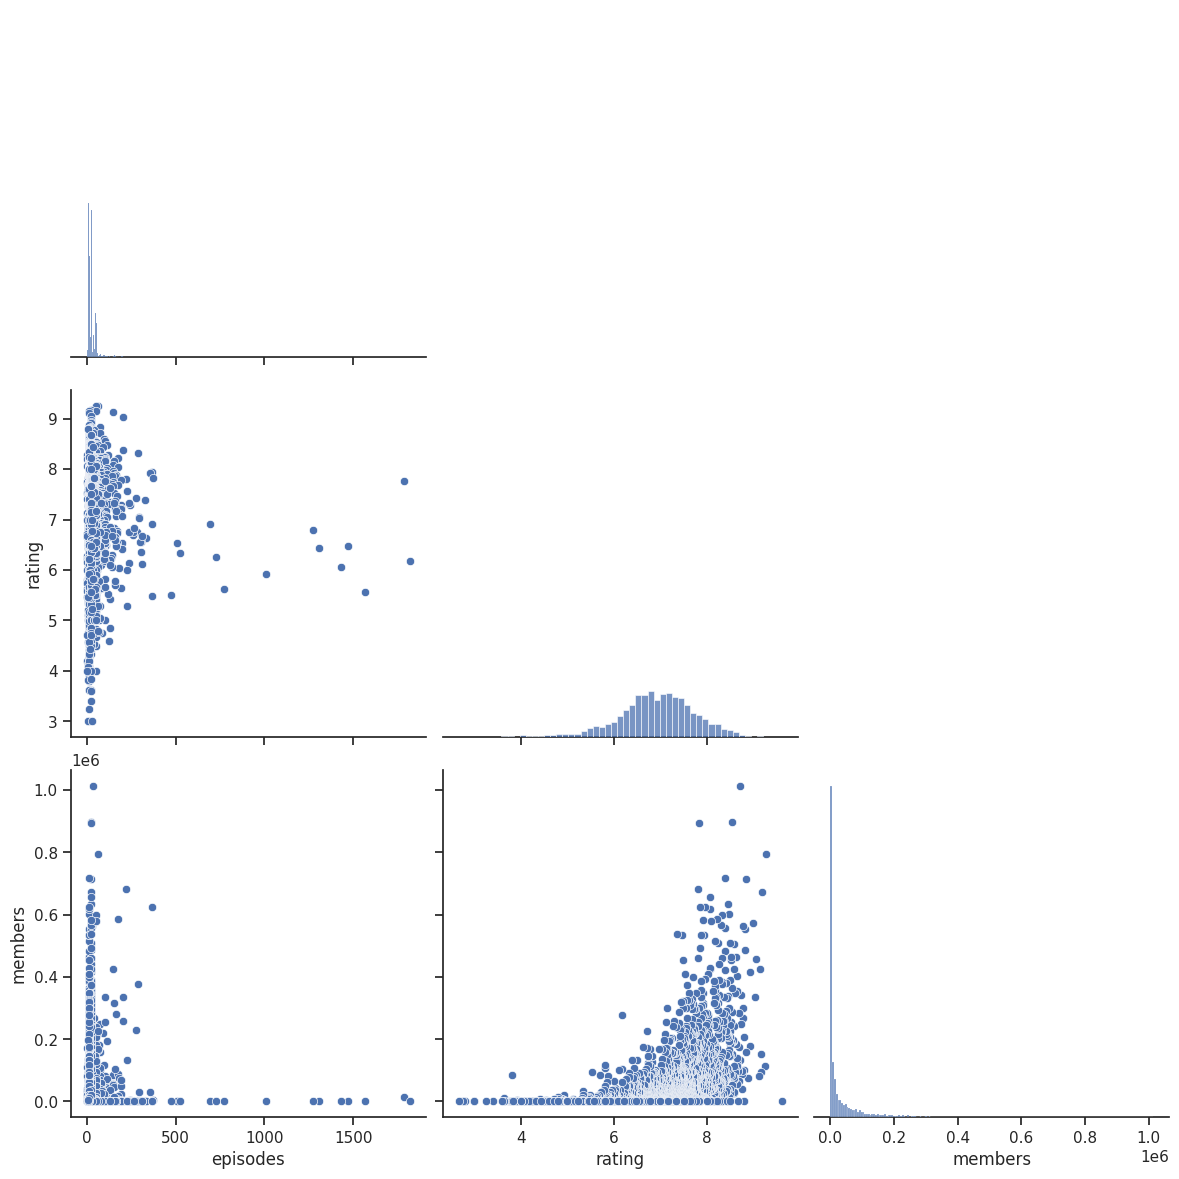

In [ ]:
# pairplot
sns.pairplot(data = anime_df, vars=["episodes","rating", "members"], height=4, corner=True);

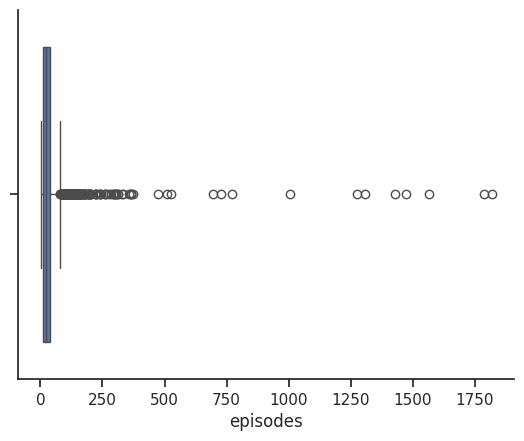

In [ ]:
#boxplot of number of episodes
sns.boxplot(data=anime_df, x="episodes")
sns.despine();

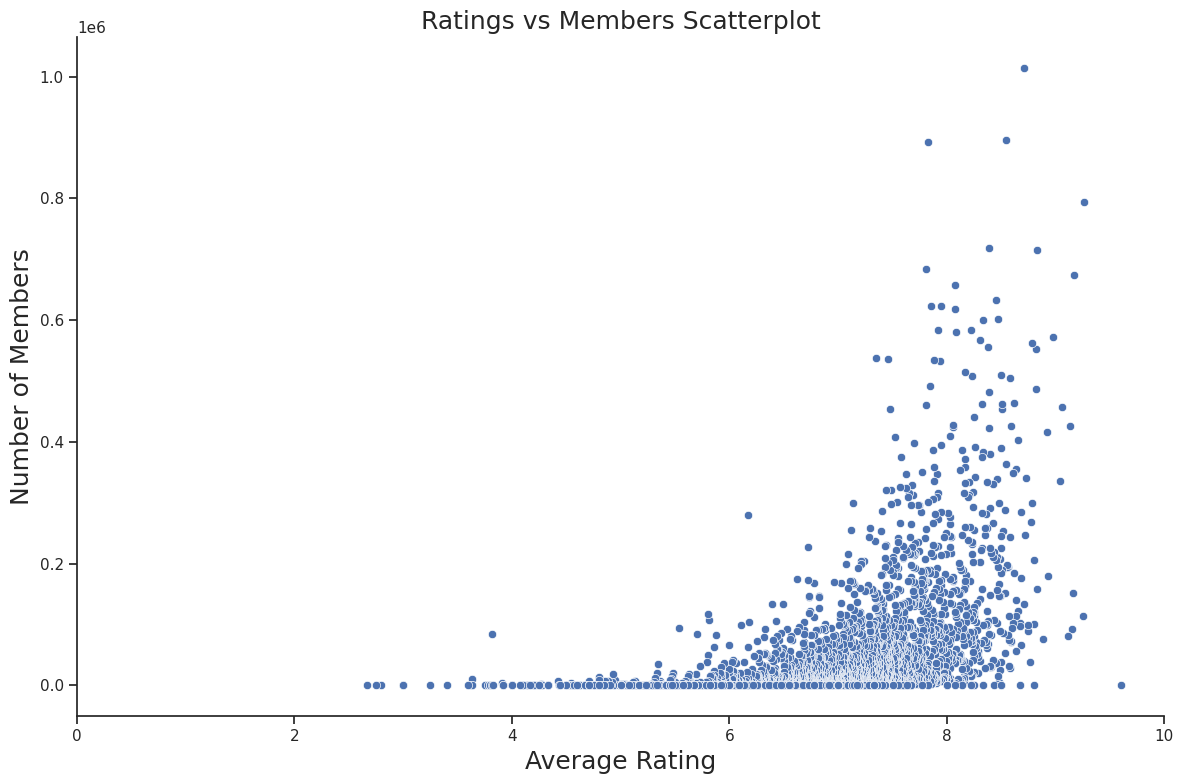

In [ ]:
#plot ratings vs members
plt.figure(figsize=(12,8))
sns.scatterplot(data=anime_df, x="rating", y="members")
plt.title("Ratings vs Members Scatterplot", size=18)
plt.xlabel("Average Rating", size=18)
plt.xlim(0, 10)
plt.ylabel("Number of Members", size=18)
sns.despine()
plt.tight_layout();

In [ ]:
# function to count the freq of animes for each genre
def count_genre_freq(df, column, delimiter=", "):
    from collections import Counter
    non_empty_rows = df[df[column].isnull() == False][column]
    row_counted = non_empty_rows.str.split(delimiter).apply(Counter)
    total_freq = dict(sum(row_counted, Counter()))
    freq_series = pd.Series(total_freq)
    output = freq_series.sort_values(ascending=False)
    return output

In [ ]:
# Find total number of animes in the dataset that belong to a certain genre
animes_per_genre = count_genre_freq(anime_df, "genre")
animes_per_genre

Comedy           1870
Action           1098
Adventure         932
Sci-Fi            774
Fantasy           765
Shounen           712
Drama             697
Romance           652
School            567
Slice of Life     562
Kids              484
Supernatural      431
Mecha             379
Magic             353
Shoujo            283
Historical        275
Ecchi             245
Sports            240
Seinen            235
Mystery           222
Super Power       190
Harem             175
Military          133
Parody            126
Music             123
Space             123
Horror            113
Game              103
Martial Arts       95
Psychological      89
Demons             89
Samurai            51
Police             50
Vampire            46
Cars               36
Thriller           34
Josei              32
Shoujo Ai          31
Shounen Ai         24
Dementia            9
dtype: int64

In [ ]:
# top 5 most frequent genres
animes_per_genre.head()

Comedy       1870
Action       1098
Adventure     932
Sci-Fi        774
Fantasy       765
dtype: int64

In [ ]:
# 5 least frequent genres
animes_per_genre.tail()

Thriller      34
Josei         32
Shoujo Ai     31
Shounen Ai    24
Dementia       9
dtype: int64

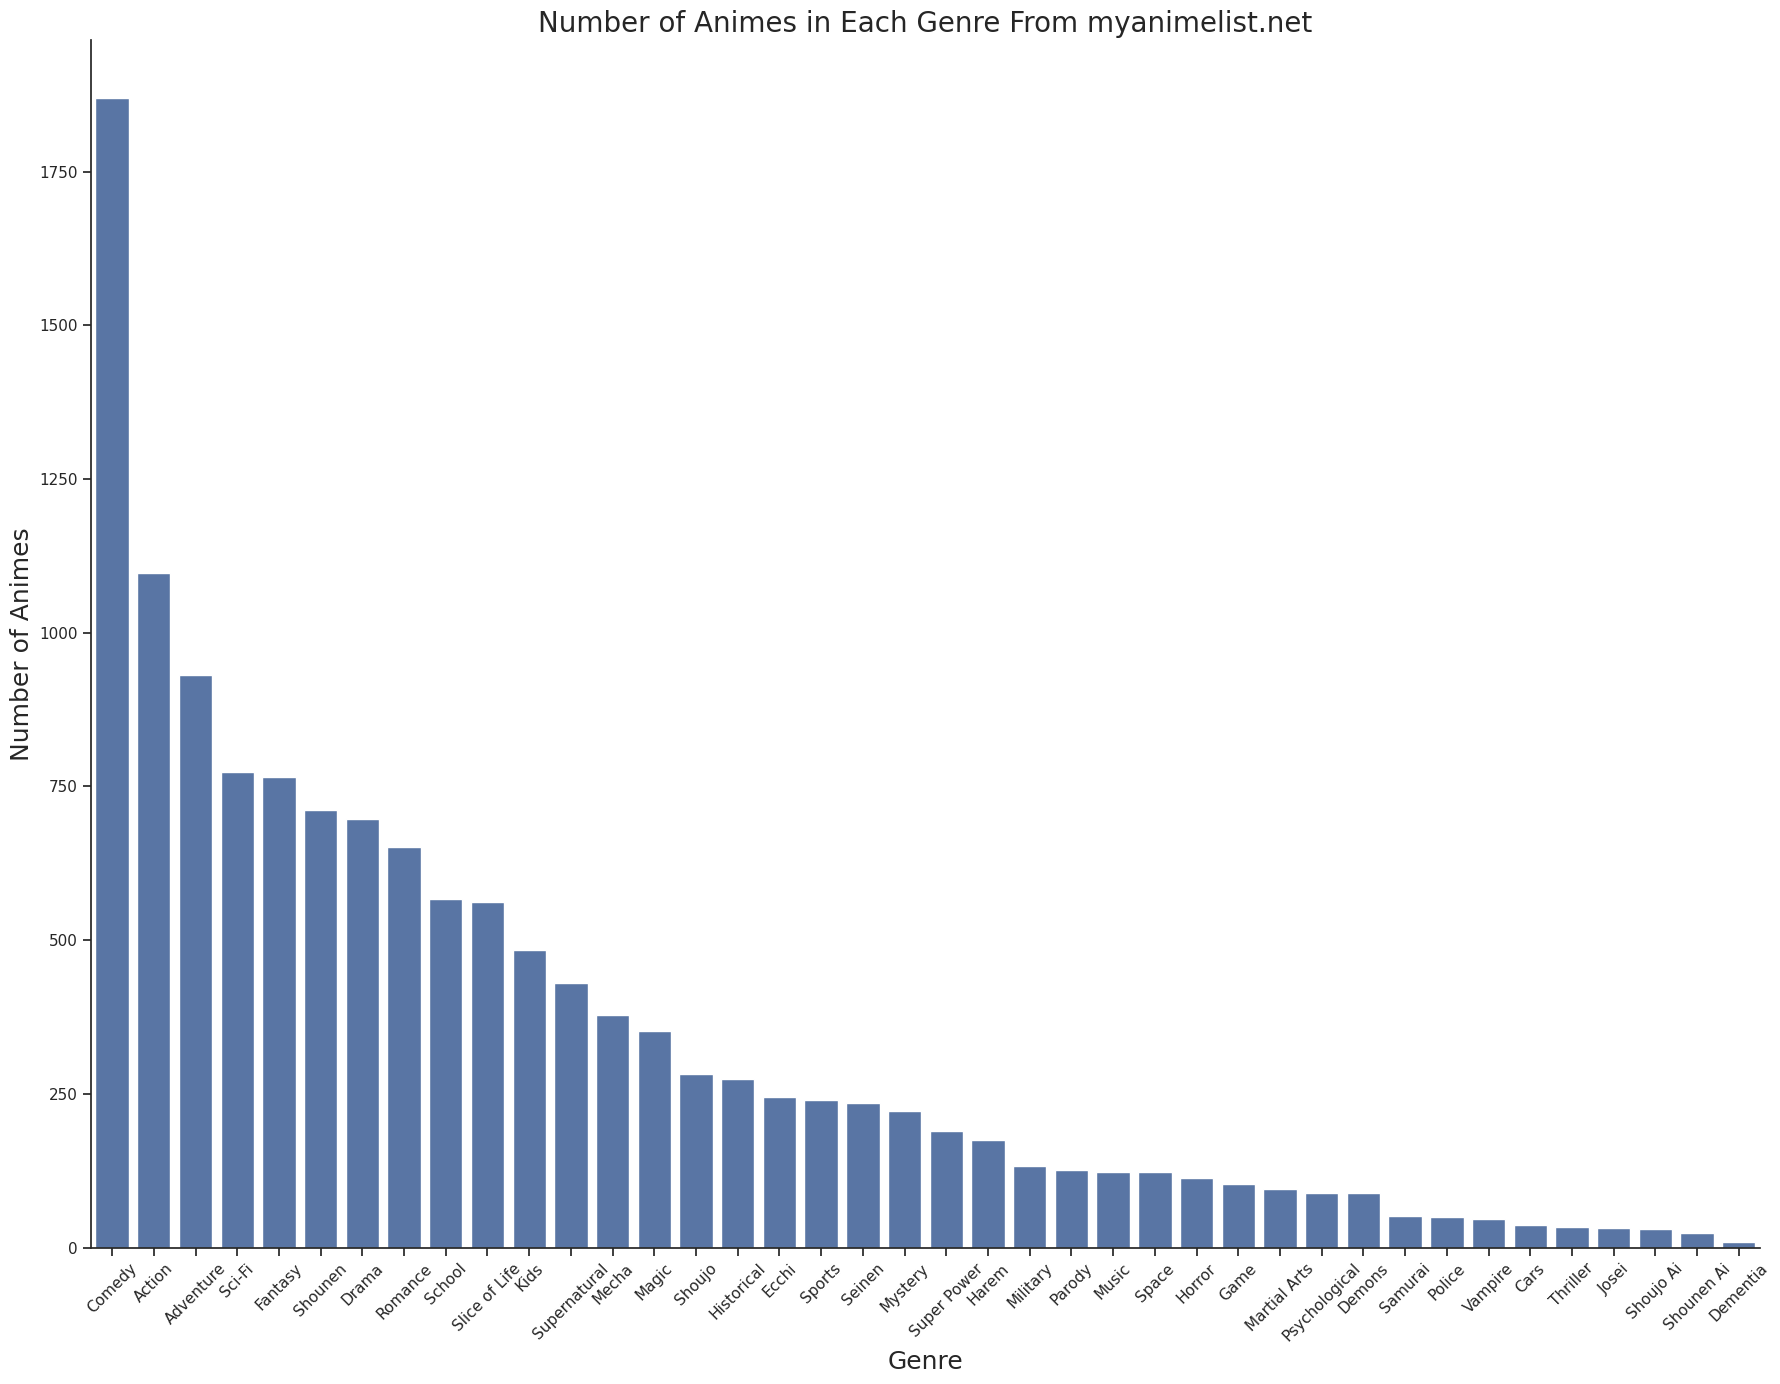

In [ ]:
# plot the number of animes per genre
plt.figure(figsize=(18,14))
sns.barplot(x=animes_per_genre.index, y=animes_per_genre.values)
plt.xlabel("Genre", size=18)
plt.ylabel("Number of Animes", size=18)
plt.xticks(rotation=45)
plt.title("Number of Animes in Each Genre From myanimelist.net", size=20)
plt.tight_layout()
sns.despine();

In [ ]:
def find_mean_median_rating(df, string):
    # Create new dataframe that contains only the rows where the genre contains the given string and the ratings are not null
    output_df = df[df["genre"].str.contains(string, na=False) & ~np.isnan(df["rating"])]["rating"]
    return output_df.mean(), output_df.median(), output_df.count()

In [ ]:
# Create a dictionary to save the information
mmc_dict = {}

In [ ]:
top_5_genres = ["Comedy", "Action", "Adventure", "Sci-Fi", "Fantasy"]
for genre in top_5_genres:
    mean, median, count = find_mean_median_rating(anime_df, genre)
    mmc_dict[genre] = [round(mean, 3), round(median,3), count]

In [ ]:
bottom_5_genres = ["Thriller", "Josei", "Shoujo Ai", "Shounen Ai", "Dementia"]
for genre in bottom_5_genres:
    mean, median, count = find_mean_median_rating(anime_df, genre)
    mmc_dict[genre] = [round(mean, 3), round(median,3), count]

In [ ]:
# Convert into a dataframe
mmc_df = pd.DataFrame.from_dict(mmc_dict, orient="index", dtype="float", columns=["Mean", "Median", "Count"])

In [ ]:
mmc_df

,Mean,Median,Count
Comedy,6.868,6.920,"1,828.000"
Action,7.107,7.130,"1,064.000"
Adventure,6.964,6.950,917.000
Sci-Fi,6.981,6.990,757.000
Fantasy,7.033,7.065,732.000
Thriller,7.886,8.025,34.000
Josei,7.610,7.600,30.000
Shoujo Ai,7.173,7.185,30.000
Shounen Ai,7.192,7.190,23.000
Dementia,7.207,7.210,7.000


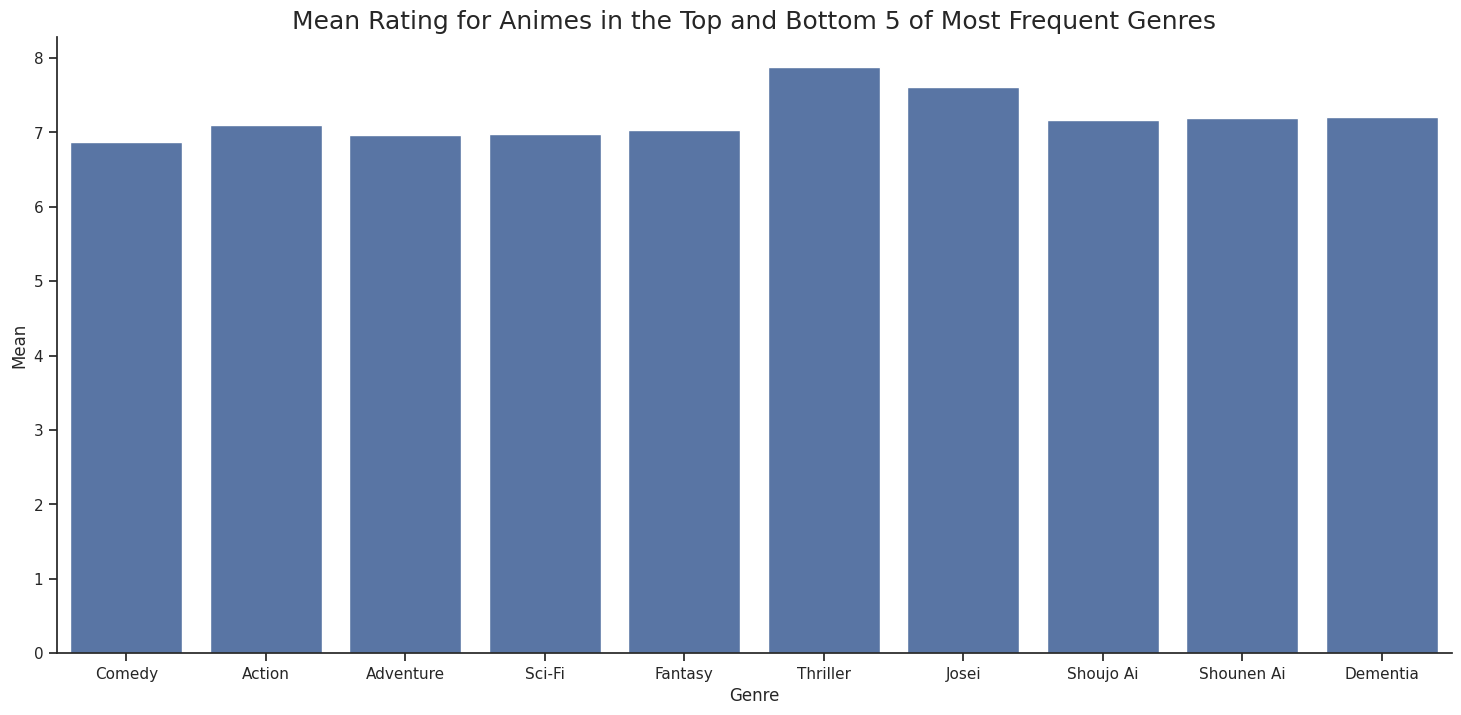

In [ ]:
# Plot mean ratings
plt.figure(figsize=(18,8))
sns.barplot(x=mmc_df.index, y=mmc_df["Mean"])
plt.xlabel("Genre", size=12)
plt.ylabel("Mean", size=12)
plt.title("Mean Rating for Animes in the Top and Bottom 5 of Most Frequent Genres", size=18)
sns.despine();

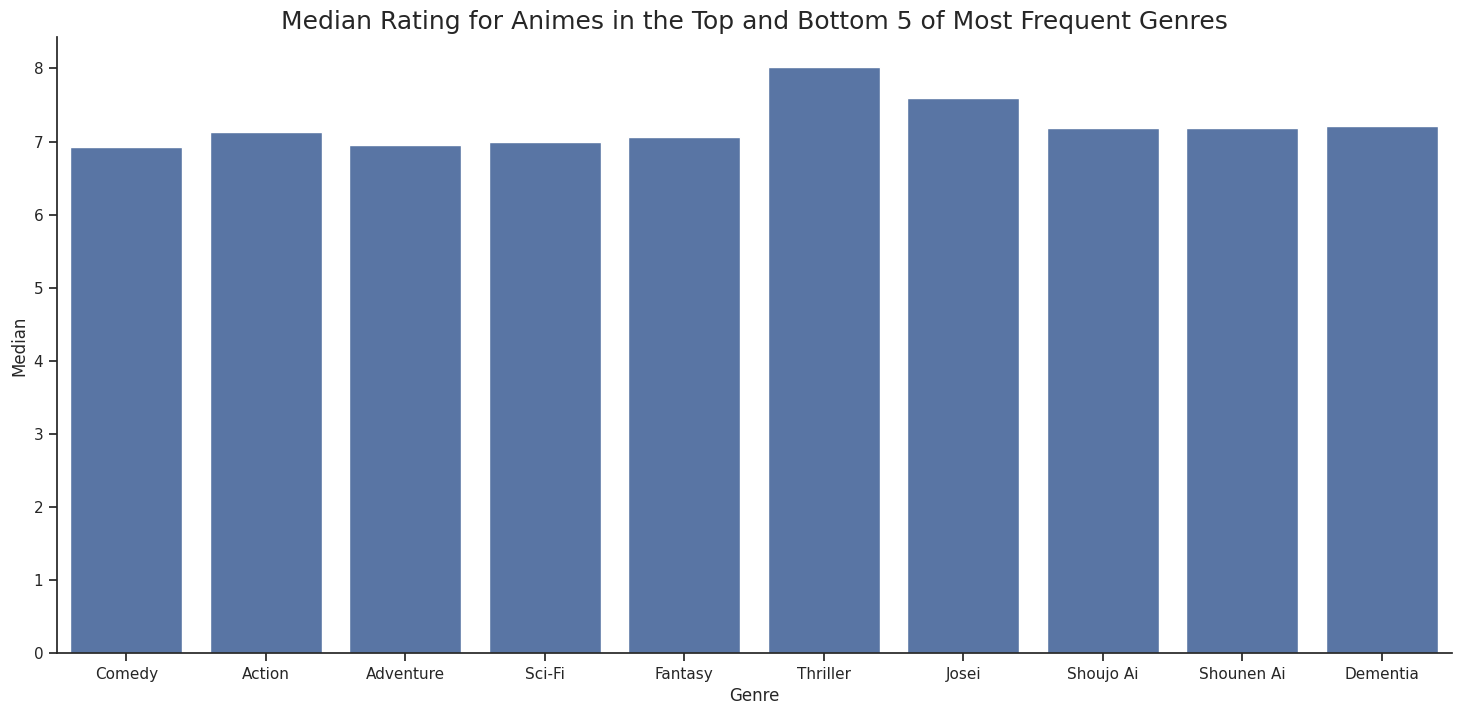

In [ ]:
# Plot median ratings
plt.figure(figsize=(18,8))
sns.barplot(x=mmc_df.index, y=mmc_df["Median"])
plt.xlabel("Genre", size=12)
plt.ylabel("Median", size=12)
plt.title("Median Rating for Animes in the Top and Bottom 5 of Most Frequent Genres", size=18)
sns.despine();

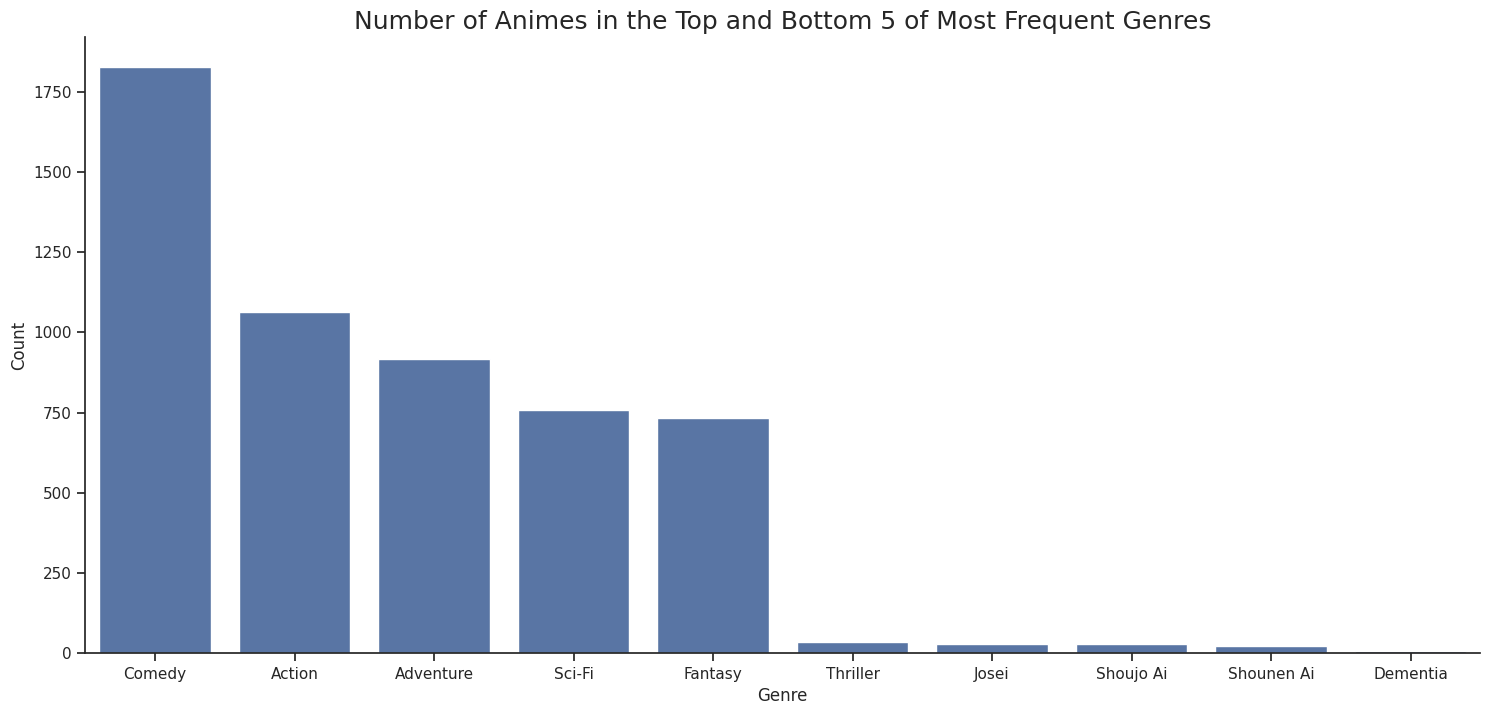

In [ ]:
# Plot number of animes in the top
plt.figure(figsize=(18,8))
sns.barplot(x=mmc_df.index, y=mmc_df["Count"])
plt.xlabel("Genre", size=12)
plt.ylabel("Count", size=12)
plt.title("Number of Animes in the Top and Bottom 5 of Most Frequent Genres", size=18)
sns.despine();

# **Ratings Dataset**

In [ ]:
# Load rating dataset
rating_df = pd.read_csv("cleaned_rating.csv")
rating_df.head(10)

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN
5,1,355,NaN
6,1,356,NaN
7,1,442,NaN
8,1,487,NaN
9,1,846,NaN


In [ ]:
# How many rows of data do we have?
print(f"In total, there are {rating_df.shape[0]} rows of data")

In total, there are 630505 rows of data


In [ ]:
# How many rows contain a rating value?
print(f"There are {rating_df[rating_df.rating.notnull()].shape[0]} rows that have ratings")

There are 509576 rows that have ratings


In [ ]:
# How many rows have empty ratings?
print(f"This means there are {rating_df[rating_df.rating.isnull()].shape[0]} rows that do not have ratings")

This means there are 120929 rows that do not have ratings


In [ ]:
rating_df[["rating"]].describe()

,rating
count,"509,576.000"
mean,7.814
std,1.554
min,1.000
25%,7.000
50%,8.000
75%,9.000
max,10.000


### How many people have rated at least one anime instead of only watching it and what proportion rate animes?

In [ ]:
# Find total amount of users
total_num_users = rating_df["user_id"].nunique()
print(f"Total number of users: {total_num_users}")

Total number of users: 6067


In [ ]:
# Number of unique users that have rated an anime before
rated_before_users = rating_df[rating_df["rating"].notnull()]["user_id"].nunique()
print(f"Number of users who have rated before: {rated_before_users}")

Number of users who have rated before: 5726


In [ ]:
# Proportion of people who have rated at least one anime
prop_rated = rated_before_users/total_num_users * 100
print(f"The proportion of people who have rated at least one anime on MyAnimeList is {prop_rated:.2f}%")

The proportion of people who have rated at least one anime on MyAnimeList is 94.38%


**Frequencies of Ratings per User**

In [ ]:
# First create a new dataframe that contains the user_id and the number of animes rated
rating_freq = rating_df.groupby("user_id")[["rating"]].count()
rating_freq.rename({"rating": "num_animes_rated"}, axis="columns", inplace=True)
rating_freq

,num_animes_rated
user_id,
1,4
2,1
3,92
4,0
5,459
...,...
6063,4
6064,28
6065,233


In [ ]:
# Summary statistics
rating_freq.describe()

,num_animes_rated
count,"6,067.000"
mean,83.991
std,121.709
min,0.000
25%,10.000
50%,40.000
75%,108.000
max,"1,584.000"


In [ ]:
# Explore how many users have rated more than 2500 animes
rating_freq[rating_freq["num_animes_rated"] > 2500]

,num_animes_rated
user_id,


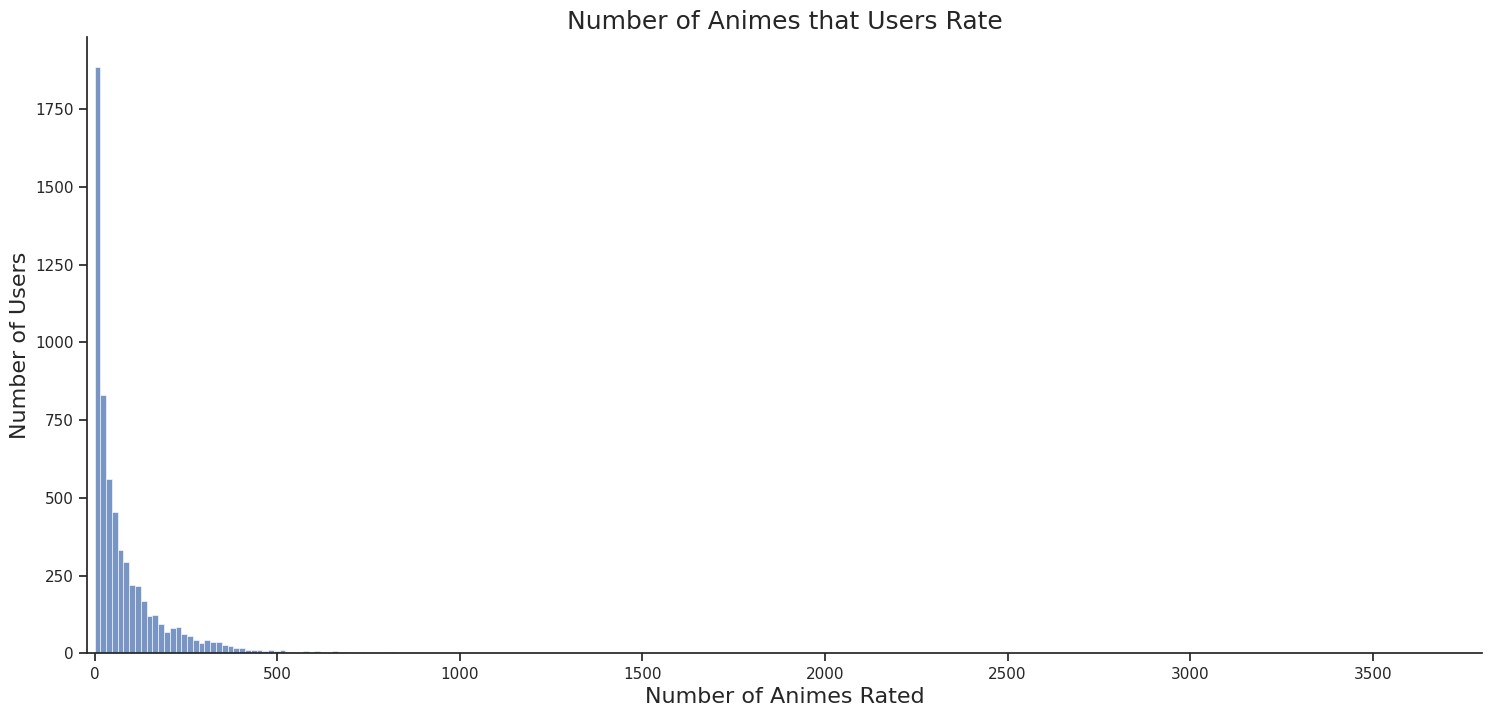

In [ ]:
# Plot out the number of animes that a user has rated
plt.figure(figsize=(18,8))
plt.xlim(left=-20, right=3800)
plt.xlabel("Number of Animes Rated",size=16)
plt.ylabel("Number of Users", size=16)
plt.title("Number of Animes that Users Rate", size=18)
sns.histplot(data=rating_freq.dropna(), x="num_animes_rated", bins=100)
sns.despine();

### For users that do rate animes, what is their average rating they give out?

In [ ]:
# Create a dataframe of user_id's and the mean and median ratings they give out
mm_ratings = rating_df.groupby("user_id")["rating"].agg(["mean","median"])
mm_ratings

,mean,median
user_id,,
1,10.000,10.000
2,10.000,10.000
3,7.565,7.000
4,NaN,NaN
5,4.355,5.000
...,...,...
6063,10.000,10.000
6064,8.179,8.500
6065,8.597,9.000


In [ ]:
# Summary statistics
mm_ratings.describe()

,mean,median
count,"5,726.000","5,726.000"
mean,8.219,8.349
std,0.913,1.020
min,1.000,1.000
25%,7.667,8.000
50%,8.193,8.000
75%,8.800,9.000
max,10.000,10.000


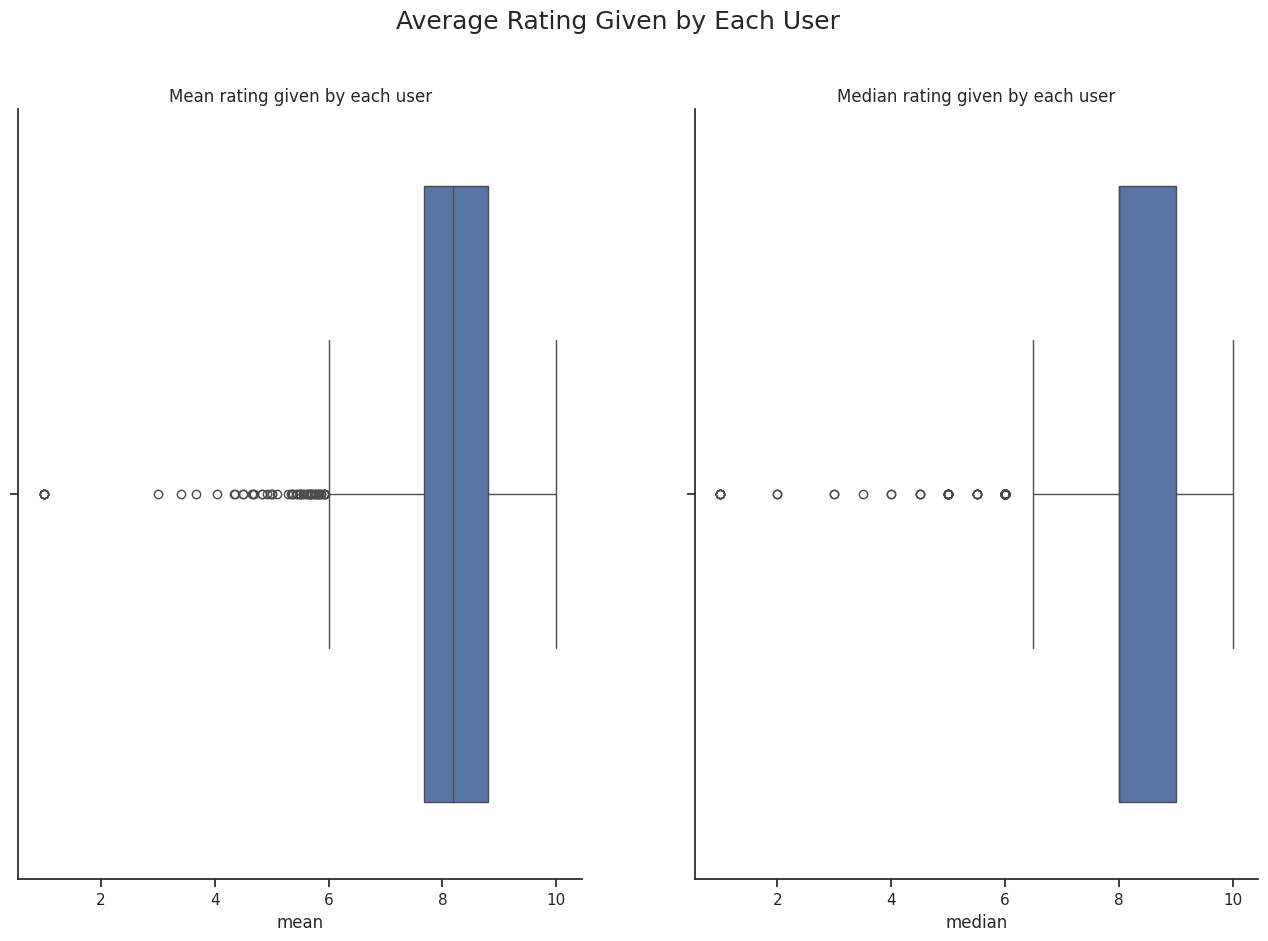

In [ ]:
# Create box plots for both averages
fig, ax = plt.subplots(1, 2, figsize=(16,10), sharey=True)
fig.suptitle("Average Rating Given by Each User", size=18)
ax[0].set_title('Mean rating given by each user', size=12)
ax[1].set_title('Median rating given by each user', size=12)
sns.boxplot(ax=ax[0], x="mean", data=mm_ratings)
sns.boxplot(ax=ax[1], x="median", data=mm_ratings)
sns.despine();